In [11]:
import requests
import pandas as pd

In [104]:
url = "https://www.statista.com/statistics/279556/global-top-asparagus-producing-countries/"
tables = pd.read_html(url)

In [106]:
tables[0].columns = ['Country', 'Production']
tables[0].loc[0,'Country'] = 'China'
tables[0].loc[6,'Country'] = 'U.S.A.'

In [100]:
def barPlotter(llval, tlabels, title, label):
    import matplotlib.pyplot as plt
    %matplotlib inline

    for x in llval:
        x = 1.0 * float(x)
        
    xpos = range(len(llval))

    ax = plt.bar(xpos, llval, align='center', alpha=0.5)
    plt.xticks(xpos, tlabels, rotation = 90)
    plt.ylabel(label)
    plt.title(title)
    plt.show()

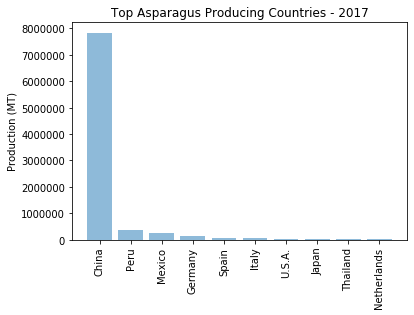

In [107]:
barPlotter( tables[0].Production, tables[0].Country, 'Top Asparagus Producing Countries - 2017', 'Production (MT)')

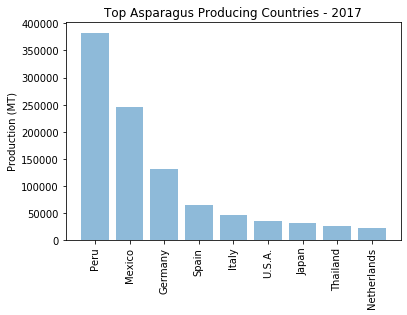

In [108]:
# Remove China from the list so we can view the rest of the asparagus producing countries.

barPlotter( tables[0].iloc[1:].Production, tables[0].iloc[1:].Country, 'Top Asparagus Producing Countries - 2017', 'Production (MT)')

In [115]:
url = "https://www.statista.com/statistics/264065/global-production-of-vegetables-by-type/"
tables = pd.read_html(url)

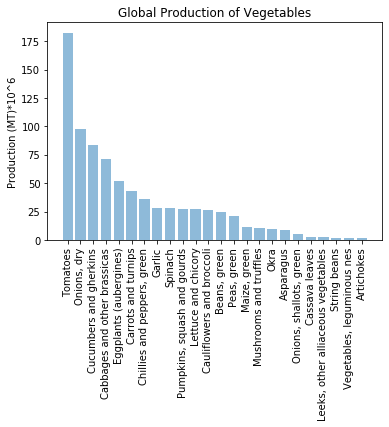

In [116]:
tables[0].columns = ["Vegetable", "Production"]
barPlotter(tables[0].Production, tables[0].Vegetable, 'Global Production of Vegetables', 'Production (MT)*10^6')

In [117]:
def linePlotter(xx, yy, title, label):
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.plot(xx, yy)
    plt.ylabel(label)
    plt.title(title)
    plt.show()

<h2>World-wide Asparagus Production</h2>

Scraping : http://www.factfish.com/statistic-country/united%20states/asparagus%2C%20production%20quantity  -  200


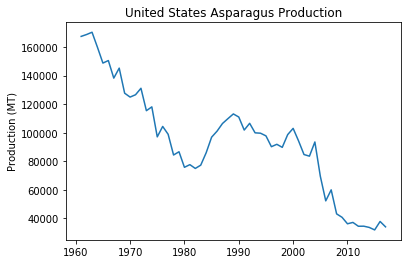

In [130]:
url = "http://www.factfish.com/statistic-country/united%20states/asparagus%2C%20production%20quantity"

import requests
response = requests.get(url)
print("Scraping :", url, " - ", response.status_code)
tables = pd.read_html(url)
USA_production = tables[1]
linePlotter(USA_production.Year, USA_production.Value, 'United States Asparagus Production', 'Production (MT)')

Scraping : http://www.factfish.com/statistic-country/china/asparagus%2C%20production%20quantity  -  200


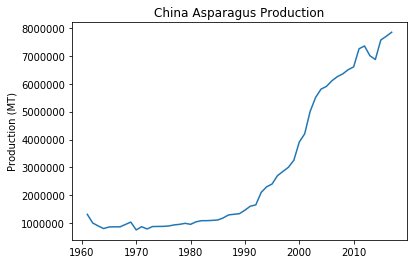

In [129]:
url = "http://www.factfish.com/statistic-country/china/asparagus%2C%20production%20quantity"
response = requests.get(url)
print("Scraping :", url, " - ", response.status_code)
tables = pd.read_html(url)
China_production = tables[1]
linePlotter(China_production.Year, China_production.Value, 'China Asparagus Production', 'Production (MT)')

Scraping : http://www.factfish.com/statistic-country/mexico/asparagus%2C%20production%20quantity  -  200


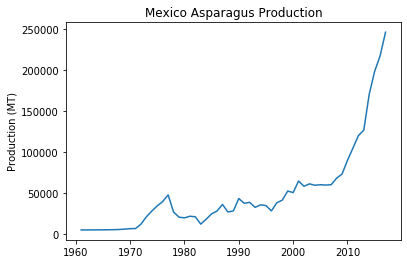

In [128]:
url = "http://www.factfish.com/statistic-country/mexico/asparagus%2C%20production%20quantity"
response = requests.get(url)
print("Scraping :", url, " - ", response.status_code)
tables = pd.read_html(url)
Mexico_production = tables[1]
linePlotter(Mexico_production.Year, Mexico_production.Value, 'Mexico Asparagus Production', 'Production (MT)')

Scraping : http://www.factfish.com/statistic-country/peru/asparagus%2C%20production%20quantity  -  200


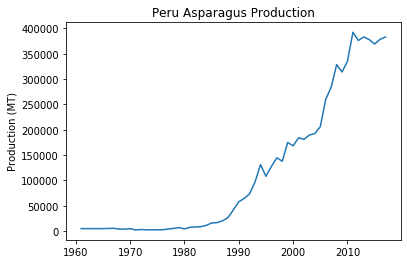

In [131]:
url = "http://www.factfish.com/statistic-country/peru/asparagus%2C%20production%20quantity"
response = requests.get(url)
print("Scraping :", url, " - ", response.status_code)
tables = pd.read_html(url)
Peru_production = tables[1]
linePlotter(Peru_production.Year, Peru_production.Value, 'Peru Asparagus Production', 'Production (MT)')

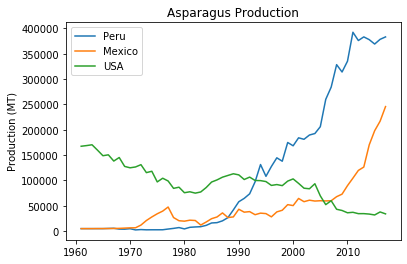

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline

hPeru, = plt.plot(Peru_production.Year, Peru_production.Value, label = "Peru")
hMexico, = plt.plot(Mexico_production.Year, Mexico_production.Value, label = "Mexico")
hUSA, = plt.plot(USA_production.Year, USA_production.Value, label = "USA")
plt.ylabel("Production (MT)")
plt.title("Asparagus Production")
plt.legend(handles=[hPeru, hMexico, hUSA], loc='upper left')

plt.show()

<h2>Consumption of Asparagus in the United States</h2>

In [187]:
# Sourced from the USDA-ERS AsparagusStats2010.pdf
# Table 8--U.S. fresh asparagus: Supply, utilization, and price, farm weight, 1960-2010.

df_fresh_asparagus = pd.read_csv("Table08.csv")

# Extract the relevant information from the dataframe. 
# Per capita usage in lbs is given in column 12 (unnamed) and the relevant
# year is in column 0.
# Only rows 8 through 63 contain relevant information.

df_fresh_asparagus = df_fresh_asparagus.iloc[8:63,[0,12]]

df_fresh_asparagus.columns = ["Year", "Per Capita Use"]
df_fresh_asparagus.dropna(inplace = True)
df_fresh_asparagus.reset_index(drop=True, inplace=True)

#print(type(df_fresh_asparagus.iloc[0,0]))

# It looks like the year values are strings. Convert them to ints.
df_fresh_asparagus.Year = df_fresh_asparagus.Year.astype(int)

# Ditto for the per capita asparagus usage, Convert them to floats.
df_fresh_asparagus["Per Capita Use"] = df_fresh_asparagus["Per Capita Use"].astype(float)

#print(df_fresh_asparagus)

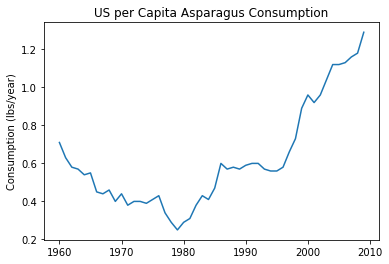

In [188]:
linePlotter(df_fresh_asparagus.Year, df_fresh_asparagus["Per Capita Use"], 'US per Capita Asparagus Consumption', 'Consumption (lbs/year)')

<h2>Production of Vegetables in the United States</h2>

Scraping : http://www.factfish.com/statistic-country/united%20states/cauliflowers%20and%20broccoli%2C%20production%20quantity  -  200
Scraping : http://www.factfish.com/statistic-country/united%20states/spinach%2C%20production%20quantity  -  200
Scraping : http://www.factfish.com/statistic-country/united%20states/cabbages%20and%20other%20brassicas%2C%20production%20quantity  -  200
Scraping : http://www.factfish.com/statistic-country/united%20states/eggplants%2C%20production%20quantity  -  200
Scraping : http://www.factfish.com/statistic-country/united%20states/string%20beans%2C%20production%20quantity  -  200


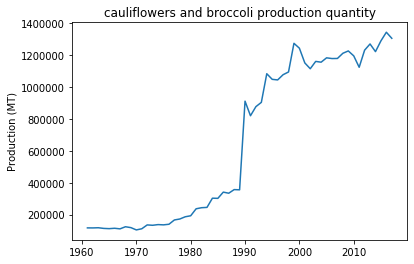

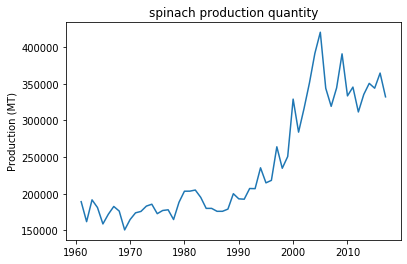

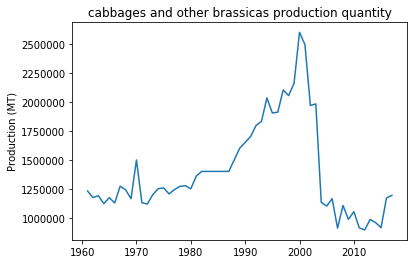

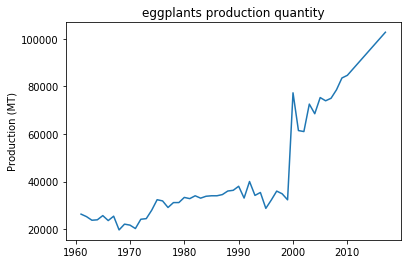

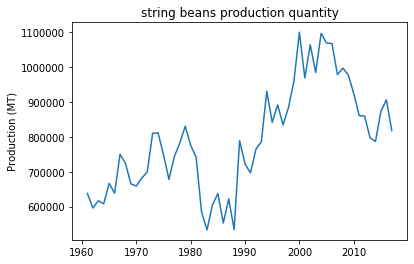

In [208]:
url_list = [
    "http://www.factfish.com/statistic-country/united%20states/cauliflowers%20and%20broccoli%2C%20production%20quantity",
    "http://www.factfish.com/statistic-country/united%20states/spinach%2C%20production%20quantity", 
    "http://www.factfish.com/statistic-country/united%20states/cabbages%20and%20other%20brassicas%2C%20production%20quantity", 
    "http://www.factfish.com/statistic-country/united%20states/eggplants%2C%20production%20quantity", 
    "http://www.factfish.com/statistic-country/united%20states/string%20beans%2C%20production%20quantity"    
]

vg_production = []

for xx in url_list:
    vgstr = xx.split("/")[-1]
    vgstr = vgstr.replace("%20", " ")
    vgstr = vgstr.replace("%2C", "")
    response = requests.get(xx)
    print("Scraping :", xx, " - ", response.status_code)
    tables = pd.read_html(xx)
    vg_production.append([tables[1], vgstr])
    
for xx in vg_production:
    linePlotter(xx[0].Year, xx[0].Value, xx[1], 'Production (MT)')

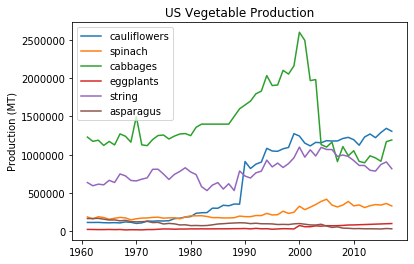

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline

handles = []

for xx in vg_production:
    hh, = plt.plot(xx[0].Year, xx[0].Value, label = xx[1].split()[0])
    handles.append(hh)
    
hh, = plt.plot(USA_production.Year, USA_production.Value, label = "asparagus")
handles.append(hh)

plt.ylabel("Production (MT)")
plt.title("US Vegetable Production")
plt.legend(handles=handles, loc='upper left')

plt.show()

In [211]:
# Plot relative increase in production relative to 1960.
for xx in vg_production:
    refval = xx[0]['Value'].loc[xx[0].Year==1961]
    xx[0]['Relative Value'] = xx[0].apply(lambda row: row['Value'] / refval - 1.0, axis=1)
    
refval = USA_production['Value'].loc[USA_production.Year==1961]    
USA_production['Relative Value'] = USA_production.apply(lambda row: row['Value'] / refval - 1.0, axis=1)    

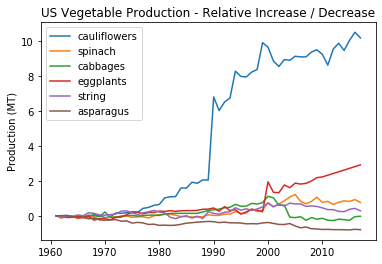

In [212]:
handles = []

for xx in vg_production:
    hh, = plt.plot(xx[0].Year, xx[0]["Relative Value"], label = xx[1].split()[0])
    handles.append(hh)
    
hh, = plt.plot(USA_production.Year, USA_production["Relative Value"], label = "asparagus")
handles.append(hh)

plt.ylabel("Production (MT)")
plt.title("US Vegetable Production - Relative Increase / Decrease")
plt.legend(handles=handles, loc='upper left')

plt.show()

<h2>Mongo DB Creation for Consumption_And_Production</h2>

In [220]:
# Create dictionaries to represent our asparagus data.

USA_Asparagus_Production = USA_production.to_dict('list')
USA_Asparagus_Production['title'] = "US Asparagus Production"
USA_Asparagus_Production['link'] = "http://www.factfish.com/statistic-country/united%20states/asparagus%2C%20production%20quantity"

Mexico_Asparagus_Production = USA_production.to_dict('list')
Mexico_Asparagus_Production['title'] = "Mexico Asparagus Production"
Mexico_Asparagus_Production['link'] = "http://www.factfish.com/statistic-country/mexico/asparagus%2C%20production%20quantity"

Peru_Asparagus_Production = USA_production.to_dict('list')
Peru_Asparagus_Production['title'] = "Peru Asparagus Production"
Peru_Asparagus_Production['link'] = "http://www.factfish.com/statistic-country/peru/asparagus%2C%20production%20quantity"

China_Asparagus_Production = USA_production.to_dict('list')
China_Asparagus_Production['title'] = "China Asparagus Production"
China_Asparagus_Production['link'] = "http://www.factfish.com/statistic-country/china/asparagus%2C%20production%20quantity"

In [221]:
# Import the pymongo library which will allow us to create and maintain a Mongo DB.
import pymongo

# Create connection variable
conn = 'mongodb://localhost:27017'

# Pass connection to the pymongo instance.
client = pymongo.MongoClient(conn)

# Connect to a database. Create a database called mars.
db = client.ETL

# Drops collection 'nutrition' if available to remove duplicates.
db.consumption_and_production.drop()

db.consumption_and_production.insert_one(USA_Asparagus_Production)
db.consumption_and_production.insert_one(Mexico_Asparagus_Production)
db.consumption_and_production.insert_one(Peru_Asparagus_Production)
db.consumption_and_production.insert_one(China_Asparagus_Production)

In [224]:
# Create a list of dictionaries to represent our vegetable production data.

vegetable_data = []
for xx in vg_production:
    vegetable_data.append(xx[0].to_dict('list'))

In [225]:
db.consumption_and_production.insert_many(vegetable_data)

In [226]:
USA_Asparagus_Consumption = df_fresh_asparagus.to_dict('list')
USA_Asparagus_Consumption['title'] = "US Asparagus per Capita Consumption"
USA_Asparagus_Consumption['source'] = "USDA - ERS - AsparagusStats2010.pdf - Table 8"

db.consumption_and_production.insert_one(USA_Asparagus_Consumption)